# Tissue of origin relationship to cell proportions in Schildkraut HGSOC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import sys 

sys.path.insert(1, '../../')
sys.path.insert(1, '../')
sys.path.insert(1, '../../../')

import src.hp as hp

np.random.seed(88)

ModuleNotFoundError: No module named 'hp'

## Load survival metadata

In [ ]:
base_path = os.path.dirname(os.getcwd())
meta_path = os.path.join(base_path, "input_data/metadata.xlsx") 

remove_treatment = False
remove_pts_with_unknowns= True

map_stage = True
remove_unknown_stage = True

## Load InstaPrism cell-fraction tables (processed) and metadata

Proportions

In [ ]:
props = pd.read_csv(os.path.join(base_path, "input_data/proportions_sch.csv"), index_col=0)
props

,SampleID,Plasma cells,B cells,Endothelial cells,T cells,Monocytes,Fibroblasts,NK cells,Epithelial cells,DC,pDC,ILC,Macrophages,Mast cells,Erythroid,Adipocytes,Dataset,suid,ID
0,18341X10,4.919765e-49,0.052767,0.029870,1.833554e-26,1.727071e-60,7.074672e-105,8.375315e-10,0.746341,1.257780e-139,3.590420e-30,2.867046e-78,1.185148e-02,1.538137e-57,0.0,0.159171,SchildkrautB,18341X10,45369
1,18341X12,9.351753e-92,0.027159,0.011666,5.972580e-66,2.258210e-157,8.180384e-107,8.135649e-61,0.848153,3.276474e-210,2.054386e-103,1.247009e-85,2.337775e-128,1.452291e-115,0.0,0.113022,SchildkrautB,18341X12,47261
2,18341X13,6.998799e-32,0.014663,0.041547,1.004614e-23,3.232466e-34,1.225464e-02,9.550579e-19,0.819028,1.104356e-115,3.157063e-69,7.123720e-41,2.994756e-02,1.850941e-63,0.0,0.082561,SchildkrautB,18341X13,47791
3,18341X14,2.410384e-97,0.162711,0.022343,2.056824e-52,5.485488e-33,2.751866e-120,7.904174e-39,0.642545,4.774011e-154,1.326676e-75,2.334007e-77,1.516542e-02,1.488048e-80,0.0,0.157235,SchildkrautB,18341X14,47916
4,18341X15,3.439318e-76,0.050581,0.055021,5.687981e-28,5.314872e-52,8.961526e-02,2.919113e-22,0.649017,7.625379e-122,1.873123e-52,3.487465e-81,1.419715e-02,4.216693e-41,0.0,0.141568,SchildkrautB,18341X15,48002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,20160X95,1.442627e-108,0.136578,0.014420,3.410104e-30,3.267116e-82,7.666630e-23,1.501224e-35,0.710289,6.509988e-151,4.903142e-78,8.571710e-105,3.473745e-03,5.671299e-79,0.0,0.135240,SchildkrautW,20160X95,47786
584,20160X96,1.359916e-92,0.190881,0.017396,5.383974e-33,2.734703e-86,1.156925e-02,1.945285e-24,0.592805,1.063562e-147,5.374615e-82,8.551669e-96,1.270617e-02,4.370517e-04,0.0,0.174205,SchildkrautW,20160X96,47903
585,20160X97,7.862780e-79,0.102850,0.053137,8.610293e-03,1.076987e-46,4.237821e-02,1.467756e-05,0.656171,3.397744e-114,5.089409e-39,1.625064e-79,2.253584e-02,9.865474e-05,0.0,0.114204,SchildkrautW,20160X97,47926
586,20160X98,1.245316e-60,0.127050,0.034344,1.345753e-16,5.846372e-04,2.787547e-02,2.169830e-04,0.673204,4.422809e-95,4.998254e-48,3.881728e-35,5.796692e-04,4.236351e-47,0.0,0.136146,SchildkrautW,20160X98,47937


In [ ]:
## The order for the plots:
desired_order = [
    'Age',
    'BMI',
    'No Adj Tx.',
    'Race: Black',
    'Residual: < 1cm',
    'Residual: ≥ 1cm',
    'Residual: Unknown size',
]
if remove_treatment:
    desired_order.remove('No Adj Tx.')
    desired_order.remove('Residual: < 1cm')
    desired_order.remove('Residual: ≥ 1cm')
    desired_order.remove('Residual: Unknown size')
desired_order

['Age',
 'BMI',
 'No Adj Tx.',
 'Race: Black',
 'Residual: < 1cm',
 'Residual: ≥ 1cm',
 'Residual: Unknown size']

### Build the analysis table  (clinical + cell fractions)


In [ ]:
renaming = hp.get_variable_renaming()
tissue_dictionary = hp.get_tissue_dictionary()
# continuous covariates to keep “as is”
cont_cols = ["Age", "BMI"]

Metadata

In [ ]:
meta_full = hp.open_and_clean_meta(meta_path=meta_path,
                                    renaming=renaming, 
                                    tissue_dictionary=tissue_dictionary)

,ID,Age,Event,Time_Yrs,Tissue,Stage,Race,BMI,AdjTx,Residual
381,110149,59,1,2.062842,Ovary,3,2,37.607951,NaN,NaN
382,110188,57,1,5.377049,Fallopian Tube and Ovary,1,2,28.891036,1.0,1.0
383,110190,74,1,5.166667,Ovary,1,2,39.704999,NaN,NaN
384,110203,47,1,1.019126,Ovary,9,2,30.896587,NaN,NaN
385,110206,65,1,2.457534,Fallopian Tube and Ovary,3,2,33.471303,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
580,310176,55,0,10.500000,Ovary,2,2,28.342414,1.0,1.0
581,310196,56,1,3.306849,Ovary,3,2,28.165274,NaN,NaN
583,310266,40,0,9.702186,Fallopian Tube,3,2,28.349557,NaN,NaN
585,320025,60,1,6.827869,Other,3,2,38.740537,1.0,3.0


In [ ]:
#match index in both
meta_full.index = meta_full.ID
props.index = props.ID
props.drop(columns=["ID", "SampleID", "suid"], inplace=True)

## and merge:
df = meta_full.join(props, how="inner")

cell_types = [col for col in df.columns if col not in meta_full.columns and col not in cont_cols]
cell_types.remove("Dataset")
print(df.Tissue.value_counts(dropna=False))

Tissue
Ovary                       63
Fallopian Tube and Ovary    45
Omentum                     16
Fallopian Tube              15
Other                        8
Name: count, dtype: int64


Plasma cells


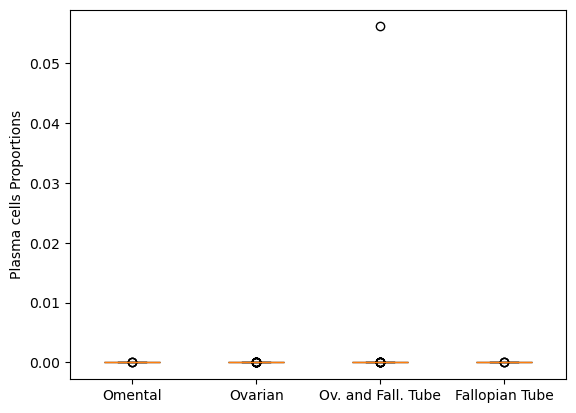

B cells


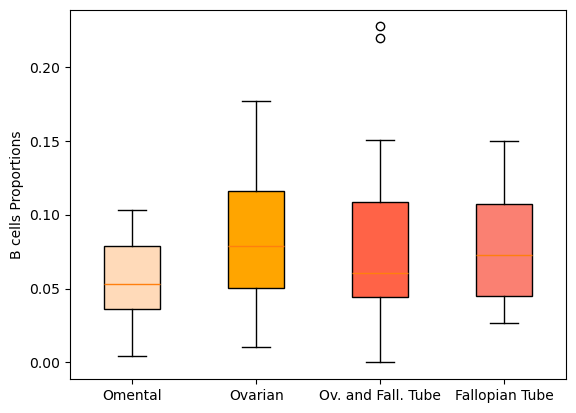

Endothelial cells


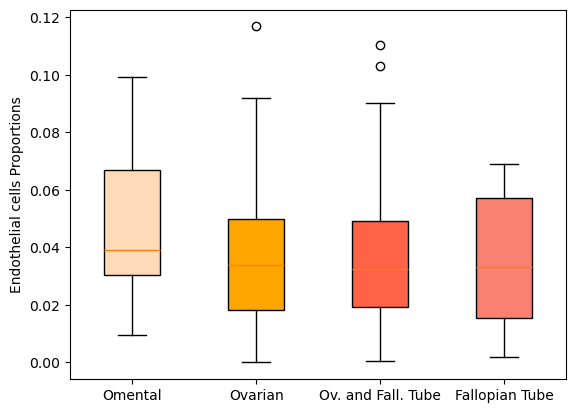

T cells


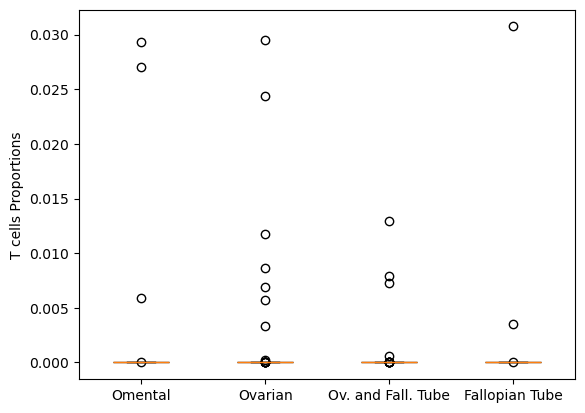

Monocytes


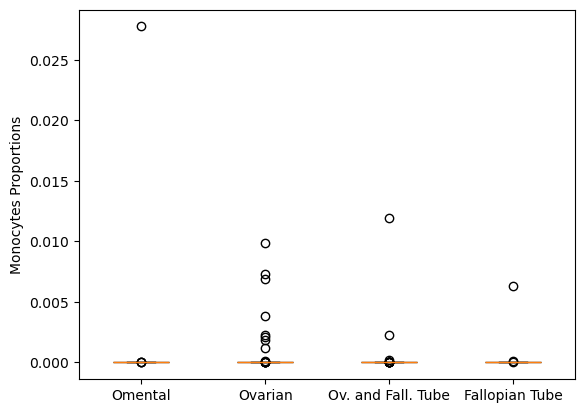

Fibroblasts


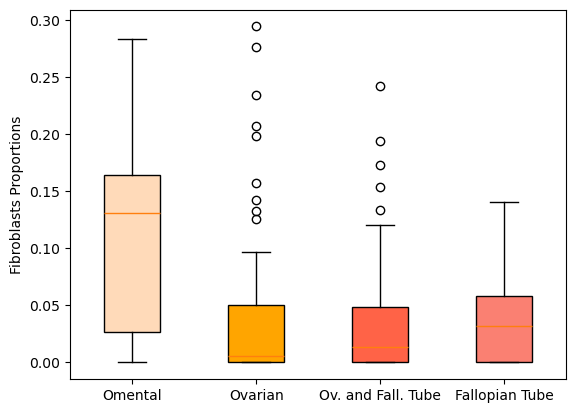

NK cells


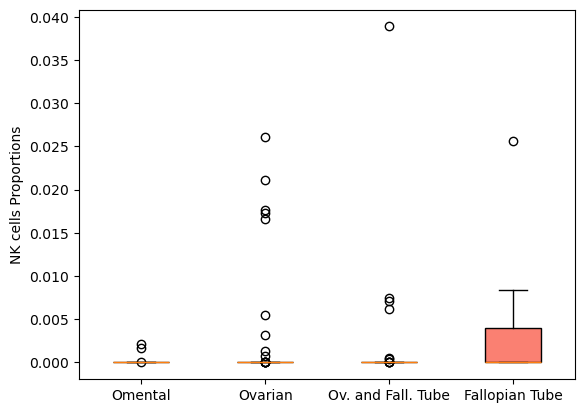

Epithelial cells


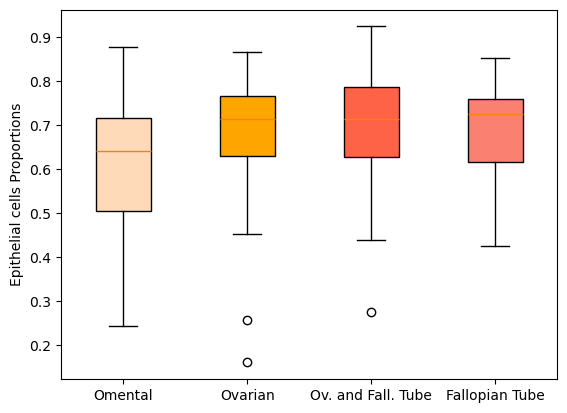

DC


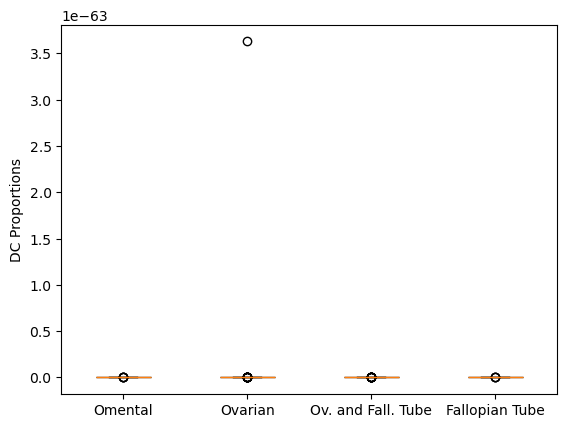

pDC


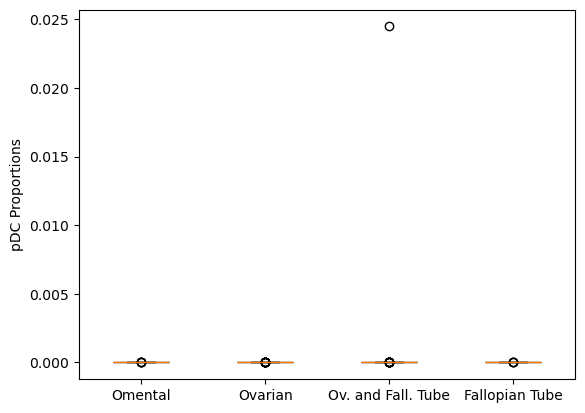

ILC


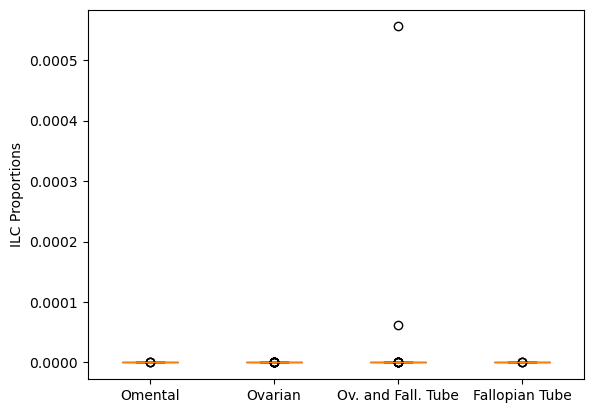

Macrophages


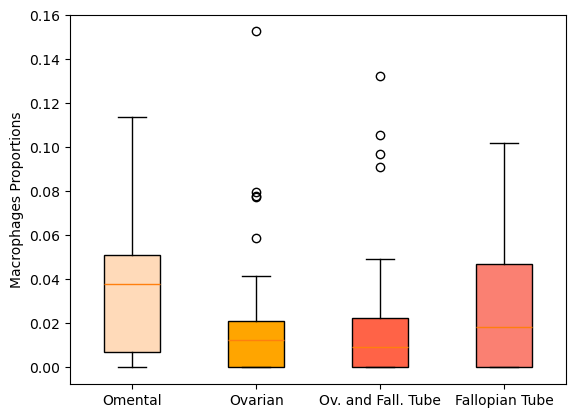

Mast cells


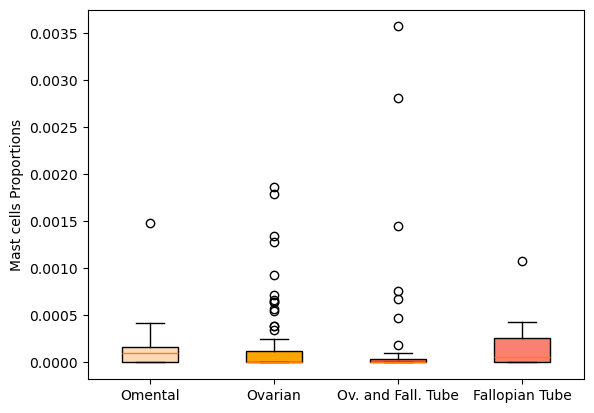

Erythroid


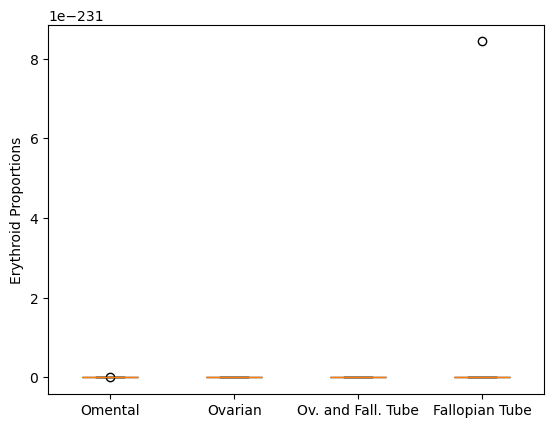

Adipocytes


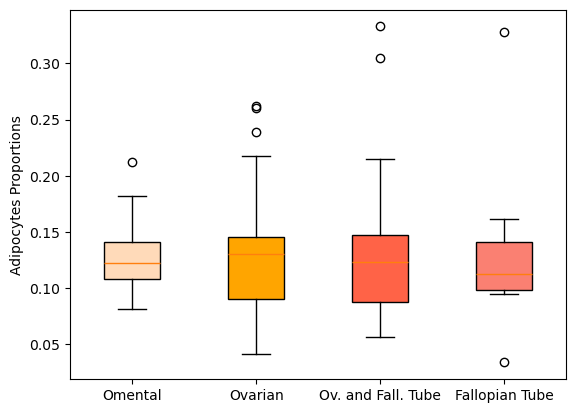

In [ ]:
labels = ['Omental', 'Ovarian', 'Ov. and Fall. Tube', 'Fallopian Tube']
colors = ['peachpuff', 'orange', 'tomato', "salmon"]

for cell in cell_types:
    print(cell)

    om = df[df.Tissue=="Omentum"][cell]
    ov = df[df.Tissue=="Ovary"][cell]
    ovft = df[df.Tissue=='Fallopian Tube and Ovary'][cell]
    ft = df[df.Tissue=='Fallopian Tube'][cell]

    values = [om, ov, ovft, ft]

    fig, ax = plt.subplots()
    ax.set_ylabel(f'{cell} Proportions')

    bplot = ax.boxplot(values,
                    patch_artist=True,  # fill with color
                    tick_labels=labels)  # will be used to label x-ticks

    # fill with colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    plt.show()

Now by group:

In [ ]:
## Which cell types to use
immune_cells = ["B cells",
                        'Mast cells',
                    'T cells',
                    'Monocytes',
                    'Plasma cells',
                    "NK cells", 
                    "DC",
                    "pDC",  
                    "Macrophages", 
                    "ILC"]

stromal_cells = ["Fibroblasts",
                        'Endothelial cells']

epi_cells = ["Epithelial cells"]

df["Immune"] = df[immune_cells].sum(axis=1)
df["Stromal"] = df[stromal_cells].sum(axis=1)
df["Epithelial"] = df[epi_cells].sum(axis=1)

In [ ]:
df['Tissue'] = df['Tissue'].apply(
    lambda x: 'Omental' if str(x) == 'Omentum' else 'Non-Omental'
)
df.Tissue.value_counts(dropna=False)

Tissue
Non-Omental    131
Omental         16
Name: count, dtype: int64

In [ ]:
# %% [markdown]
# ### Omentum vs Non-Omentum × Adipocyte / Immune / Stromal – t-test + Bonferroni  (FIXED)

# %%
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

df_om          = df.copy()
df_om["IsOmentum"] = (df_om["Tissue"] == "Omental").astype(int)
fractions      = ["Adipocytes", "Immune", "Stromal", "Epithelial"]

rows = []
for frac in fractions:
    om  = df_om.loc[df_om.IsOmentum == 1, frac]
    non = df_om.loc[df_om.IsOmentum == 0, frac]
    
    u_stat, p_raw = mannwhitneyu(om, non, alternative="two-sided")
    rows.append({
        "Fraction"     : frac,
        "Median_Oment" : om.median(),
        "Median_NonOm" : non.median(),
        "p_raw"        : p_raw
    })

res = pd.DataFrame(rows)
res["p_bonf"] = multipletests(res.p_raw, method="bonferroni")[1]
res = res.sort_values("p_bonf")

print("\n=== Omentum vs Non-Omentum (Mann–Whitney, Bonferroni) ===")
display(res.round(4))


=== Omentum vs Non-Omentum (Mann–Whitney, Bonferroni) ===


,Fraction,Median_Oment,Median_NonOm,p_raw,p_bonf
2,Stromal,0.1876,0.0502,0.0033,0.0132
3,Epithelial,0.6414,0.7146,0.0364,0.1454
0,Adipocytes,0.1222,0.1235,0.5157,1.0000
1,Immune,0.0957,0.0959,0.7820,1.0000


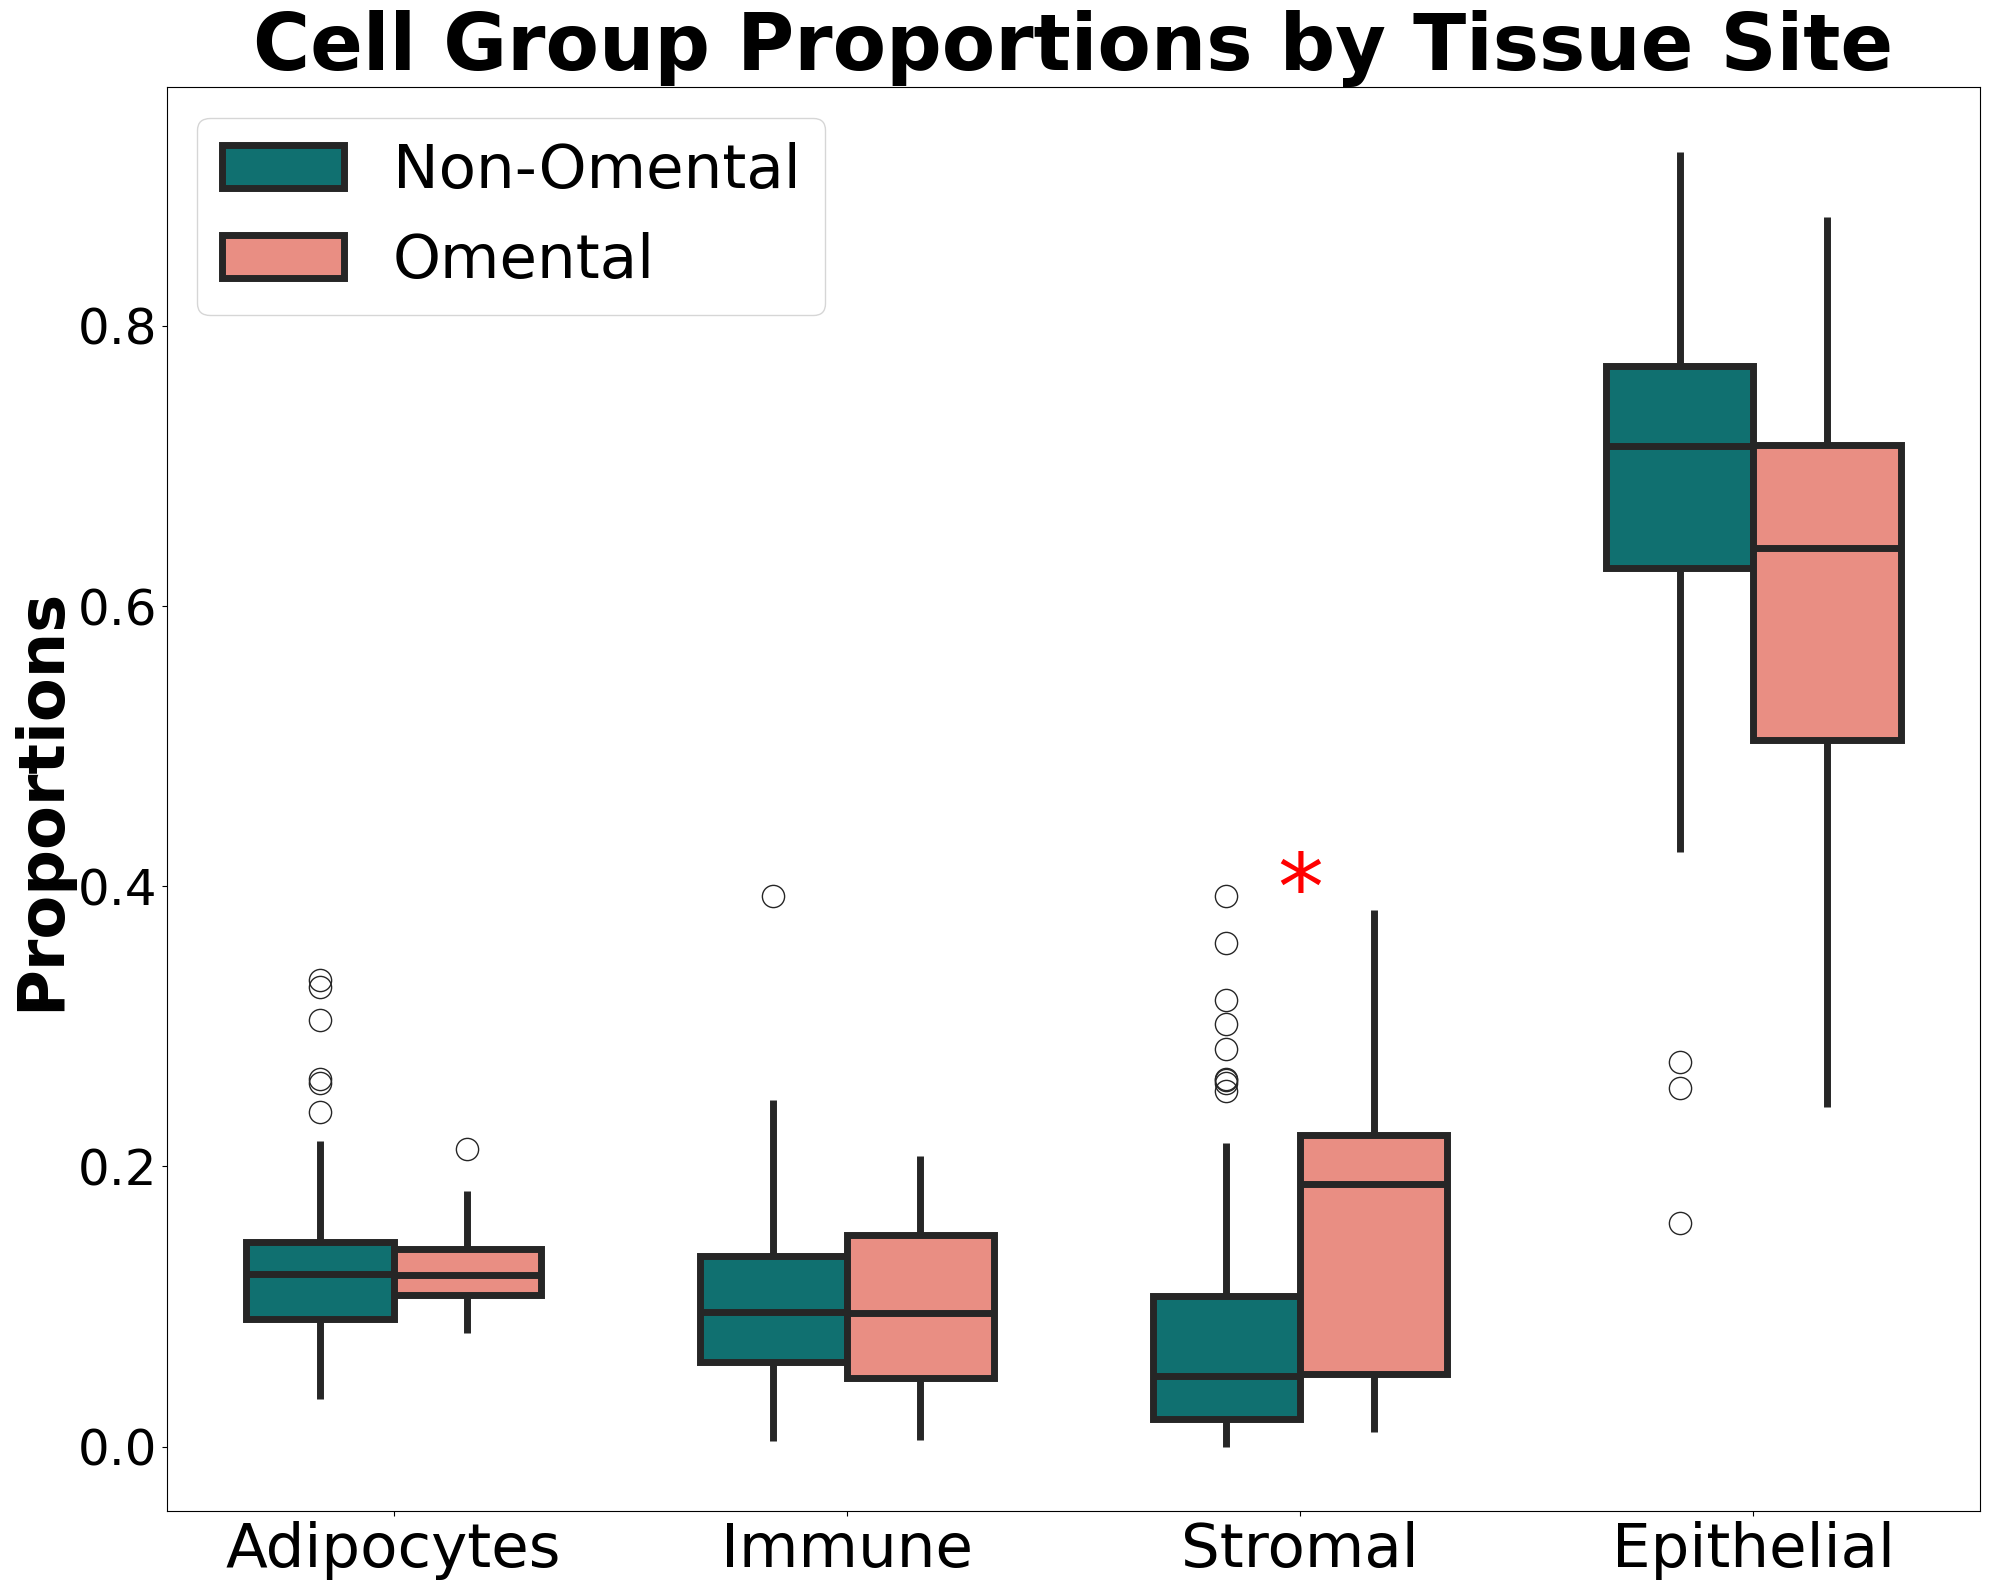

In [ ]:
# ── 4. Plot ALL fractions with significance stars ──────────────────────────

# build tidy frame with tissue names (not 0/1 flag)
long_all = (df_om[["Tissue"] + fractions]      # Tissue = "Omental"/"Other"
            .replace({"Other": "Non-Omental"}) # rename for legend clarity
            .melt(id_vars="Tissue",
                  var_name="Fraction", value_name="Prop"))

palette = {"Omental": "salmon", "Non-Omental": "teal"}

plt.figure(figsize=(20,16))
ax = sns.boxplot(
        data=long_all, x="Fraction", y="Prop",
        hue="Tissue", palette=palette, width=.65,
        showcaps=False, fliersize=16, linewidth=5)

# ── add significance stars (p_bonf from res DF) ─────────────────────────
for i, frac in enumerate(fractions):
    p_adj = res.loc[res.Fraction == frac, "p_bonf"].values[0]
    star  = hp.p_to_star(p_adj)
    if star:
        y_max = long_all.loc[long_all.Fraction == frac, "Prop"].max() - 0.05
        ax.text(i, y_max + 0.02, star, ha="center",
                va="bottom", color="red", fontsize=66)

plt.ylabel("Proportions", fontsize=46, fontweight="bold")
plt.xlabel("", fontsize=46, fontweight="bold")
plt.title("Cell Group Proportions by Tissue Site",  fontsize=56, fontweight="bold")
plt.legend(title="",fontsize=44, loc='best')
plt.xticks(fontsize=44)
plt.yticks(fontsize=36)
plt.tight_layout()
plt.show()